# Face_Recognition

In [1]:
import face_recognition

In [2]:
import matplotlib.pyplot as plt

The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image.

In [3]:
from skimage.feature import hog

In [4]:
from skimage import data,exposure
import cv2

In [6]:
image=cv2.imread('Dr_Kalam.jpg')

In [7]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [8]:
# fd is the feature-descriptor (used to represent the images)
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

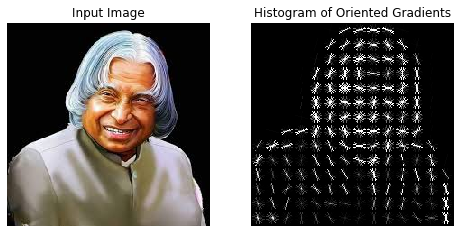

In [9]:
%matplotlib inline
# Plot Input and hog image
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')
# Rescale histogram for better display
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [10]:
len(fd)

1568

In [11]:
image.shape

(225, 225, 3)

In [12]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np

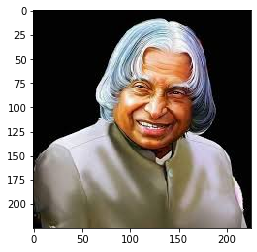

In [17]:
# Load the jpg or any file into a numpy array
image=cv2.imread('Dr_Kalam.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [18]:
# Find all the faces in the Image 
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 1 face(s) in input image.


A face is located at pixel Top: 86,Left: 56,Bottom: 175,Right: 146


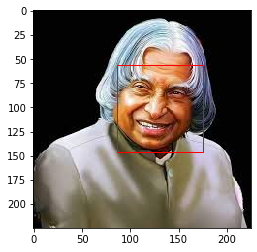

In [19]:
# get axis handle
plt.imshow(image)
ax=plt.gca()

# repeat for all faces found
for face_location in face_locations:
    # Print the location of each face in this image.Each face is a list of co-ordinates
    top,right,bottom,left=face_location
    x,y,w,h=left,top,right,bottom
    print("A face is located at pixel Top: {},Left: {},Bottom: {},Right: {}".format(x,y,w,h))
    # Let's draw a box around the face
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)
    plt.show()

In [20]:
# Load the known images
image=cv2.imread('Dr_Kalam.jpg')
kalam=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread('Modi.jpg')
modi=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread('Kalam_Modi.jpg')
kl_mo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [21]:
# Get the face encoding of each person.
kalam_encoding=face_recognition.face_encodings(kalam)[0]
modi_encoding=face_recognition.face_encodings(modi)[0]
kl_mo_encoding=face_recognition.face_encodings(kl_mo)[0]

# Create a database of all known face encodings
known_face_encodings=[
    kalam_encoding,
    modi_encoding,
    kl_mo_encoding
]

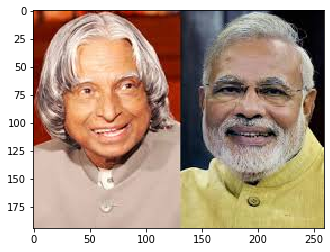

In [32]:
# Load the image we want to check
# unknown_image=face_recognition.load_image_file("random.jpg")
image=cv2.imread('Kalam_Modi.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#Get face encodings for any people in the picture
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [33]:
from scipy.spatial import distance

In [34]:
# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:
    results=face_recognition.compare_faces(known_face_encodings,unknown_face_encoding,tolerance=0.6)
#     results=[]

#     for known_face_encoding in known_face_encodings:
#         d=distance.euclidean(known_face_encodings,unknown_face_encoding)
#         results.append(d)
# #         threshold=0.6
#         results=np.array(results)<=threshold
        
    name='Unknown'
        
    if results[0]:
        name='Kalam'
    elif results[1]:
        name='Modi'
    elif results[2]:
        name='Kalam&Modi'
            
    print(f"Found {name} in the photo!")        

Found Modi in the photo!
Found Kalam in the photo!


In [85]:
results

[True, False, False]